In [1]:
%matplotlib inline
from pylab import *
from ipywidgets import interact, widgets
from IPython import display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from forward_kinematics import ForwardKinematicsAgent
agent = ForwardKinematicsAgent()

In [3]:
agent.start()

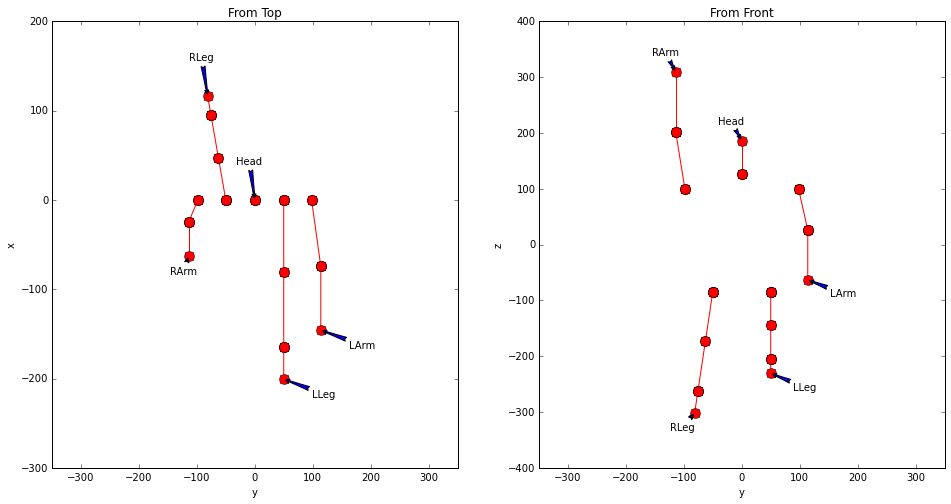

In [10]:
def plot_forward(showLabels = False):
    figure(figsize=(16,8))
    for chain, chain_joints in agent.chains.iteritems():
        lastX = agent.transforms[chain_joints[0]][0][-1]
        lastY = agent.transforms[chain_joints[0]][1][-1]
        lastZ = agent.transforms[chain_joints[0]][2][-1]
        for joint in chain_joints[1:]:
            x = agent.transforms[joint][0][-1]
            y = agent.transforms[joint][1][-1]
            z = agent.transforms[joint][2][-1]
            plt.subplot(1,2,1)
            plot([lastY, y],[-lastX, -x], '-or', markersize = 10)
            plt.subplot(1,2,2)
            plot([lastY, y],[lastZ, z], '-or', markersize = 10)
            lastX = x
            lastY = y
            lastZ = z
        x = agent.endeffectorTransforms[chain][0][-1]
        y = agent.endeffectorTransforms[chain][1][-1]
        z = agent.endeffectorTransforms[chain][2][-1]
        plt.subplot(1,2,1)
        plot([lastY, y],[-lastX, -x], '-or', markersize = 10)
        if showLabels:
            plt.annotate(chain, xy = (y, -x), xytext = (np.sign(y) * 40 + y + 10, np.sign(-x) * 30 + -x + 10), arrowprops = dict(arrowstyle = "fancy"))
        plt.subplot(1,2,2)
        plot([lastY, y],[lastZ, z], '-or', markersize = 10)
        if showLabels:
            plt.annotate(chain, xy = (y, z), xytext = (np.sign(y) * 40 + y, np.sign(z) * 30 + z), arrowprops = dict(arrowstyle = "fancy"))
            
    plt.subplot(1,2,1)
    plt.title("From Top")
    plt.xlabel("y")
    plt.ylabel("x")
    plt.xlim([-350,350])
    plt.ylim([-300,200])
    plt.subplot(1,2,2)
    plt.title("From Front")
    plt.xlabel("y")
    plt.ylabel("z")
    plt.xlim([-350,350])
    plt.ylim([-400,400])
    display.clear_output(wait = True)

#setup Button:
def updateOnClick(ev = None):
    plot_forward()
updateButton = widgets.Button(description = "update plot")
updateButton.on_click(updateOnClick)
def showLabelsOnClick(ev = None):
    plot_forward(True)
showLabelsButton = widgets.Button(description = "show labels")
showLabelsButton.on_click(showLabelsOnClick)
#setup interactive rest
joint_name='HeadYaw'
@interact(name=agent.joint_names)
def set_test_joint(name):
    global agent
    global joint_name
    joint_name = name
    agent.testJoint = joint_name
@interact(value=(-pi/2, pi/2, pi/40))
def set_joint_target(value):
    agent.target_joints[joint_name] = value
    plot_forward()
display.display(updateButton)
display.display(showLabelsButton)
